In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from classification_utils import *
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,49.622176,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.058472,0.084281,0.365536,2.680103,1.357545,14.574041
std,0.499031,78.524757,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.230465,0.109621,0.408358,2.353441,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.000000,0.017751,0.136692,0.450561,0.010526,0.104251
50%,1.000000,12.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.000000,0.045752,0.230747,1.945910,0.043478,0.238606
75%,1.000000,55.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.000000,0.088862,0.451218,5.065383,0.949402,24.144412
max,1.000000,291.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,1.386294,0.529903,2.183383,8.187960,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

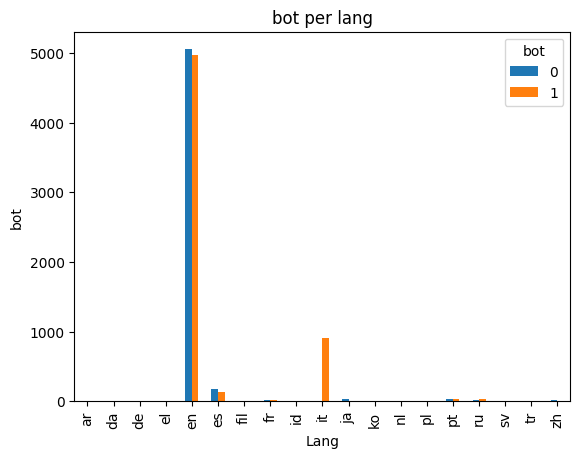

In [6]:
plot_lang_hist(data)

In [7]:
data = data.join(pd.get_dummies(data["lang"]))

In [8]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'reply_count_entropy', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


In [9]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
1087524055,8,40.996854,14.694444,0.022022,0.440000,0.020674,0.0,0.0,0.0,0.363146,...,0,0,0,0,0,0,0,0,0,0
1175025703,21,71.750000,17.250000,0.125000,0.083333,0.333333,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
375777649,9,46.664693,10.016685,0.025296,0.723628,0.011302,0.0,0.0,0.0,0.349569,...,0,0,0,0,0,0,0,0,0,0
466257969,110,86.061635,18.626415,0.024528,0.008176,0.077987,0.0,0.0,0.0,0.250943,...,1,0,0,0,0,0,0,0,0,0
329804273,7,37.500000,14.694444,0.000000,0.750000,0.000000,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [10]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [11]:
train_set = preprocessing.normalize(train_set)
test_set = preprocessing.normalize(test_set)

In [12]:
k_range = list(range(8, 31))
param_grid = dict(
    n_neighbors = k_range,
    weights = list({'uniform', 'distance'}),
    algorithm = list({'auto', 'ball_tree', 'kd_tree', 'brute'})
)

knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 184 candidates, totalling 920 fits
[CV 1/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.984 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.988 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.988 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.984 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.985 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, n_neighbors=8, weights=distance;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=8, weights=distance;, score=0.988 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=8, weights=distance;, score=0.986 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=8, weights=distance;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=8, we

[CV 3/5] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.985 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.980 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.985 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.984 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.985 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=17, weights=uniform;, score=0.980 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=17, weights=uniform;, score=0.984 total time=   0.0s
[CV 3

[CV 1/5] END algorithm=ball_tree, n_neighbors=24, weights=distance;, score=0.981 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=24, weights=distance;, score=0.987 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=24, weights=distance;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=24, weights=distance;, score=0.985 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=24, weights=distance;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=25, weights=uniform;, score=0.980 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=25, weights=uniform;, score=0.982 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, n_neighbors=25, weights=uniform;, score=0.981 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=25, weights=uniform;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=25, weights=uniform;, score=0.983 total time=   0.0s
[CV 1

[CV 2/5] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.987 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.986 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.983 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.985 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.983 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.987 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.988 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.985 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=11, weights=uniform;, score=0.981 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=11,

[CV 5/5] END algorithm=brute, n_neighbors=18, weights=distance;, score=0.984 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=19, weights=uniform;, score=0.981 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=19, weights=uniform;, score=0.984 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=19, weights=uniform;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=19, weights=uniform;, score=0.983 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=19, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=19, weights=distance;, score=0.981 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=19, weights=distance;, score=0.986 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=19, weights=distance;, score=0.984 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=19, weights=distance;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=19,

[CV 2/5] END algorithm=brute, n_neighbors=27, weights=distance;, score=0.985 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=27, weights=distance;, score=0.981 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=27, weights=distance;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=27, weights=distance;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=28, weights=uniform;, score=0.981 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=28, weights=uniform;, score=0.983 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=28, weights=uniform;, score=0.981 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=28, weights=uniform;, score=0.983 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=28, weights=uniform;, score=0.982 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=28, weights=distance;, score=0.980 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=28,

[CV 3/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.984 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.981 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.987 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.987 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform;, score=0.981 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform;, score=0.985 total time=   0.0s
[CV 3/5] END algorithm=kd

[CV 3/5] END algorithm=kd_tree, n_neighbors=21, weights=distance;, score=0.984 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=21, weights=distance;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=21, weights=distance;, score=0.985 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.980 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.985 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.981 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.981 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.986 total time=   0.0s
[CV 3/5] END algorithm=kd

[CV 3/5] END algorithm=kd_tree, n_neighbors=30, weights=uniform;, score=0.981 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=30, weights=uniform;, score=0.983 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=30, weights=uniform;, score=0.982 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=30, weights=distance;, score=0.980 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=30, weights=distance;, score=0.985 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=30, weights=distance;, score=0.982 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=30, weights=distance;, score=0.985 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=30, weights=distance;, score=0.982 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.988 total time=   0.0s
[CV 3/5] END algorithm=auto, n_ne

[CV 2/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.984 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.985 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.981 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.985 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.984 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.985 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=17, weights=uniform;, score=0.980 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=17, weights=un

[CV 4/5] END algorithm=auto, n_neighbors=24, weights=distance;, score=0.985 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=24, weights=distance;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.980 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.982 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.981 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.980 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.987 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=25, weights=di

In [13]:
knn = grid.best_estimator_

In [14]:
train_pred = knn.predict(train_set)
test_pred = knn.predict(test_set)

In [15]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9883302296710118
Accuracy test set  0.9843614248479583
Precision train set  0.9883590290301334
Recall train set  0.9883302296710118
F1 score train set  0.9883326504951946
Support train set  (array([0.98395581, 0.99224077]), array([0.99125596, 0.98575099]), array([0.9875924 , 0.98898524]), array([3774, 4281], dtype=int64))


In [16]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.98      0.99      0.98      1618
         >50       0.99      0.98      0.99      1835

    accuracy                           0.98      3453
   macro avg       0.98      0.98      0.98      3453
weighted avg       0.98      0.98      0.98      3453



In [17]:
# cross validation
scores = cross_validate(knn, train_set, train_label, cv = 3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.013333638509114584
Score time  0.16617528597513834
Test score  0.9848541278708877
Train score  0.9872749844816884


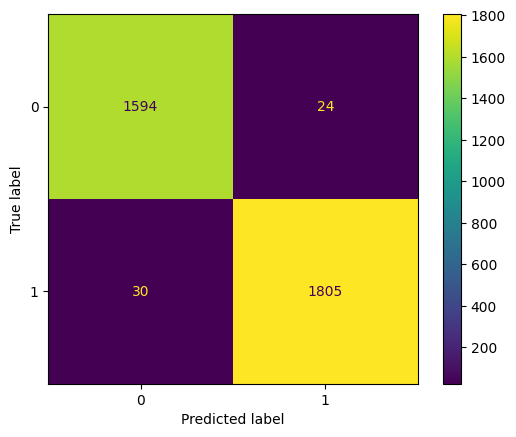

In [18]:
predictions = knn.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

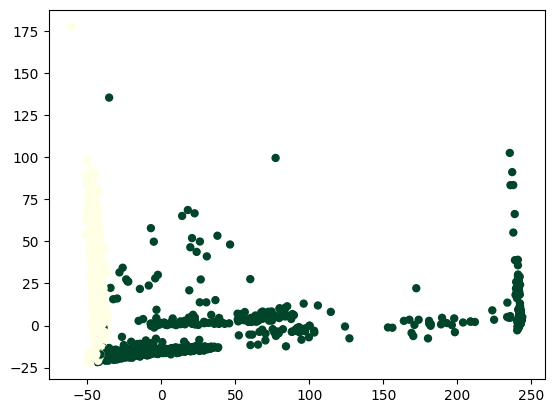

In [19]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25, cmap='YlGn');

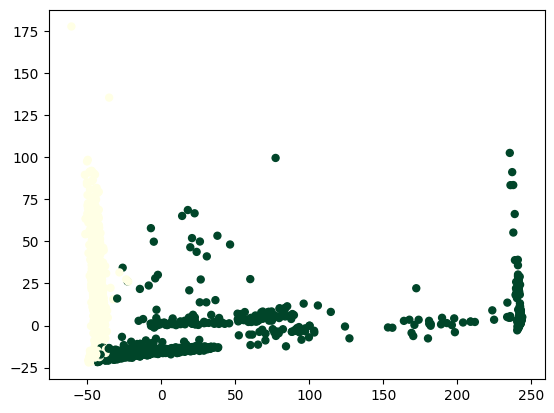

In [20]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25, cmap='YlGn');

### Without lang

In [21]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [22]:
data.drop(columns=['lang'])

,name,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903
2358850842,Lourie Botton,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495
137959629,Dadan Syarifudin,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008
2571493866,MBK Ebook,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911861962,Madrid Lae Maika .,0,2019-11-29 13:16:02,7,52.677158,12.767086,0.024281,0.775180,0.192446,0.0,0.0,0.0,0.053058,0.250664,3.942318,0.043478,58.838683
1378532629,Clau Sato,0,2018-04-27 03:01:58,8,59.716210,12.984608,0.088504,0.524772,0.114959,0.0,0.0,0.0,0.199134,0.506598,5.721018,4.565176,34.533536
126984069,ALMA LETICIA NUÑO,0,2015-03-29 17:01:24,1,67.666667,15.833333,0.005109,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2383025796,Minnie Guadagno,1,2019-03-13 02:44:13,42,63.278846,13.971154,0.000000,0.365385,0.009615,0.0,0.0,0.0,0.076923,0.266469,2.079442,0.067308,0.286371


In [23]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'reply_count_entropy', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std']


In [24]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
499854962,7,65.340909,14.694444,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2662011020,5,70.350694,14.246528,0.097222,0.930556,0.229167,0.0,0.000000,0.000000,0.100694,0.862168,1.949858,0.043478,72.730941
326236752,291,78.951359,17.204076,0.005109,0.000000,0.000000,0.0,0.000000,0.000000,0.015217,0.126778,3.975841,0.005978,0.077088
622856954,36,65.295455,16.522727,0.000000,0.000000,0.113636,0.0,0.208299,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000
616301001,64,51.631579,12.684211,0.000000,0.026316,0.105263,0.0,0.296272,1.332179,0.052632,0.276002,1.039721,0.013158,0.113951


In [25]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [26]:
train_set = preprocessing.normalize(train_set)
test_set = preprocessing.normalize(test_set)

In [27]:
k_range = list(range(8, 31))
param_grid = dict(
    n_neighbors = k_range,
    weights = list({'uniform', 'distance'}),
    algorithm = list({'auto', 'ball_tree', 'kd_tree', 'brute'})
)

knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 184 candidates, totalling 920 fits
[CV 1/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.986 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.984 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.984 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=8, weights=distance;, score=0.986 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=8, weights=distance;, score=0.984 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=8, weights=distance;, score=0.982 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=8, weights=distance;, score=0.980 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=8, we

[CV 3/5] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.982 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.982 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=16, weights=uniform;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.984 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.981 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.983 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=16, weights=distance;, score=0.984 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=17, weights=uniform;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=17, weights=uniform;, score=0.981 total time=   0.0s
[CV 3

[CV 3/5] END algorithm=ball_tree, n_neighbors=24, weights=distance;, score=0.980 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=24, weights=distance;, score=0.980 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=24, weights=distance;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=25, weights=uniform;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=25, weights=uniform;, score=0.982 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=25, weights=uniform;, score=0.980 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=25, weights=uniform;, score=0.979 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=25, weights=uniform;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=25, weights=distance;, score=0.983 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=25, weights=distance;, score=0.983 total time=   0.0s
[CV 3

[CV 3/5] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.985 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=10, weights=uniform;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.986 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.982 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.981 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=10, weights=distance;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=11, weights=uniform;, score=0.986 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=11, weights=uniform;, score=0.984 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=11,

[CV 5/5] END algorithm=brute, n_neighbors=18, weights=distance;, score=0.984 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=19, weights=uniform;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=19, weights=uniform;, score=0.983 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=19, weights=uniform;, score=0.980 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=19, weights=uniform;, score=0.980 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=19, weights=uniform;, score=0.982 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=19, weights=distance;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=19, weights=distance;, score=0.983 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=19, weights=distance;, score=0.982 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=19, weights=distance;, score=0.980 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=19,

[CV 2/5] END algorithm=brute, n_neighbors=27, weights=distance;, score=0.983 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=27, weights=distance;, score=0.980 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=27, weights=distance;, score=0.980 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=27, weights=distance;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=28, weights=uniform;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=28, weights=uniform;, score=0.981 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=28, weights=uniform;, score=0.979 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=28, weights=uniform;, score=0.981 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=28, weights=uniform;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=28, weights=distance;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=28,

[CV 3/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.981 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.985 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.985 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.983 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.982 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.985 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform;, score=0.986 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform;, score=0.983 total time=   0.0s
[CV 3/5] END algorithm=kd

[CV 1/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.983 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.981 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.981 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.982 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.983 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.984 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.981 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.980 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=kd

[CV 1/5] END algorithm=kd_tree, n_neighbors=30, weights=distance;, score=0.983 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=30, weights=distance;, score=0.982 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=30, weights=distance;, score=0.980 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=30, weights=distance;, score=0.980 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=30, weights=distance;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.986 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.984 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.984 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.984 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=8, w

[CV 4/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.982 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.984 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.981 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.983 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.984 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=17, weights=uniform;, score=0.984 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=17, weights=uniform;, score=0.981 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=17, weights=uniform;, score=0.983 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=17, weights=un

[CV 3/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.980 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.979 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.983 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.983 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.983 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.980 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.980 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.982 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=26, weights=uniform;, score=0.983 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=26, weights=uniform;, score=0.982 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=26, weights=un

In [28]:
knn = grid.best_estimator_

In [29]:
train_pred = knn.predict(train_set)
test_pred = knn.predict(test_set)

In [30]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9868404717566729
Accuracy test set  0.9829134086301766
Precision train set  0.9868822838686877
Recall train set  0.9868404717566729
F1 score train set  0.9868437447823056
Support train set  (array([0.98161765, 0.99152343]), array([0.99046105, 0.98364868]), array([0.98601952, 0.98757036]), array([3774, 4281], dtype=int64))


In [31]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.98      0.99      0.98      1618
         >50       0.99      0.98      0.98      1835

    accuracy                           0.98      3453
   macro avg       0.98      0.98      0.98      3453
weighted avg       0.98      0.98      0.98      3453



In [32]:
# cross validation
scores = cross_validate(knn, train_set, train_label, cv = 3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.009063720703125
Score time  0.11876002947489421
Test score  0.982991930477964
Train score  0.9865301055245189


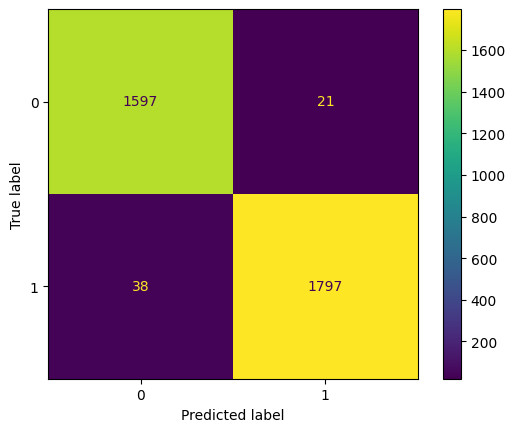

In [33]:
predictions = knn.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

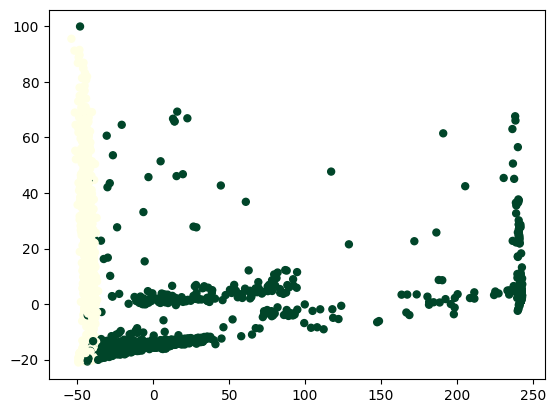

In [34]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25, cmap='YlGn');

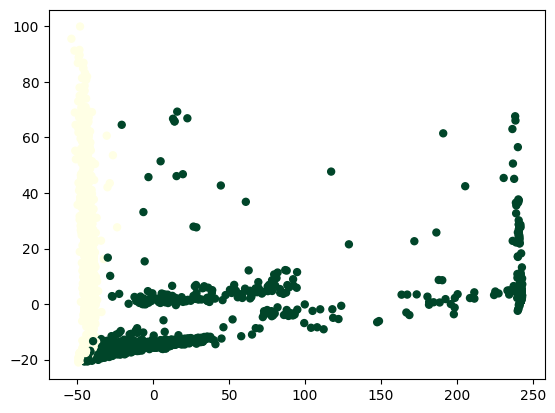

In [35]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25, cmap='YlGn');